In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
""" Whats in this file
1. read Data
2. figuring out the distribution style of data 
3. relationship analysis of features using scatterplot, pairplot and correlation heat map 
4. Feature selection based on relationship observed
5. remove features that has less influence on dependent variable
6. Copy data to clean excel file """

' Whats in this file\n1. read Data\n2. figuring out the distribution style of data \n3. relationship analysis of features using scatterplot, pairplot and correlation heat map \n4. Feature selection based on relationship observed\n5. remove features that has less influence on dependent variable\n6. Copy data to clean excel file '

In [4]:
turbine_data=pd.read_excel('cleaned_turbine_data.xlsx')

In [12]:
turbine_data.set_index('TimeStamp',inplace=True)

In [13]:
turbine_data.describe()

,Generated watts,Exhaust temp,Comp Inlet Temp,Comp IGV angle,Comp discharge pressure,Comp discharge temp
count,7555.000000,7555.000000,7555.000000,7555.000000,7555.000000,7555.000000
mean,35.206227,585.131903,79.571235,55.261666,74.604488,377.523001
std,36.892939,469.509086,8.044631,24.513209,75.715975,270.389579
min,-0.033970,59.602717,58.187590,31.964838,-0.785665,62.466905
25%,-0.020262,80.269639,74.657742,32.027338,-0.018596,79.908083
50%,5.317973,762.570842,79.446271,40.328032,49.768233,392.218642
75%,76.412200,1051.040679,84.148491,83.797117,157.321503,639.784660
max,83.185464,1100.311494,100.924816,83.998651,166.726751,701.815532


In [ ]:
# using histograms to see understand distribution of each feature including Target

In [26]:
def plot_histograms(cols):
    total_cols=len(cols)
    width_cols=math.ceil(np.sqrt(total_cols))
    height_rows=math.ceil(total_cols/width_cols)
    fig, axs=plt.subplots(height_rows, width_cols)

    for ind, col in enumerate(cols):
        x=math.floor(ind/width_cols)
        y=ind - x*width_cols

        if height_rows == 1:
            if width_cols == 1:
                sns.distplot(turbine_data[col],kde=True,ax=axs)
            else:
                sns.distplot(turbine_data[col],kde=True,ax=axs[y])
        else:
            sns.distplot(turbine_data[col],kde=True,ax=axs[x, y])


C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

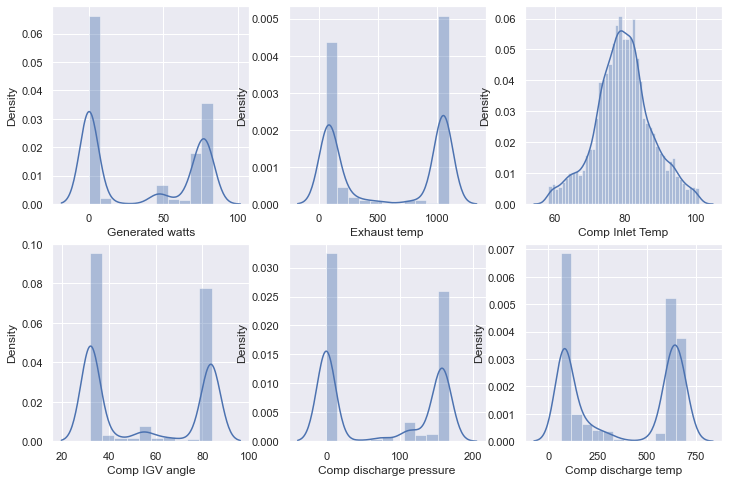

In [27]:
plot_histograms(list(turbine_data.columns))

In [34]:
# using scatterplot to see relationship between Generated watts and each indivitual feature

In [31]:
def plot_scatterplot(cols):
    total_cols=len(cols)
    width_cols=math.ceil(np.sqrt(total_cols))
    height_rows=math.ceil(total_cols/width_cols)
    fig, axs=plt.subplots(height_rows, width_cols)

    for ind, col in enumerate(cols):
        x=math.floor(ind/width_cols)
        y=ind - x*width_cols

        if height_rows == 1:
            if width_cols == 1:
                sns.scatterplot(x = turbine_data['Generated watts'], y = turbine_data[col], ax=axs)
            else:
                sns.scatterplot(x = turbine_data['Generated watts'], y = turbine_data[col], ax=axs[y])
        else:
            sns.scatterplot(x = turbine_data['Generated watts'], y = turbine_data[col], ax=axs[x, y])

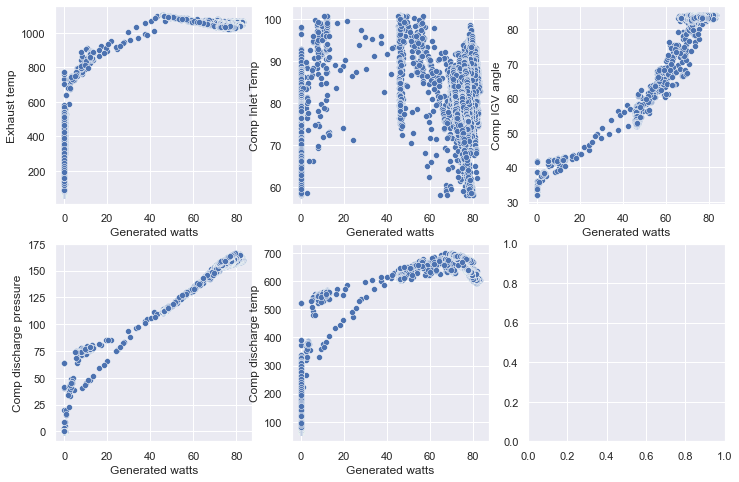

In [33]:
plot_scatterplot(list(turbine_data.columns)[1:])

In [35]:
# using pairplot to see pairwise scatterplot of features.

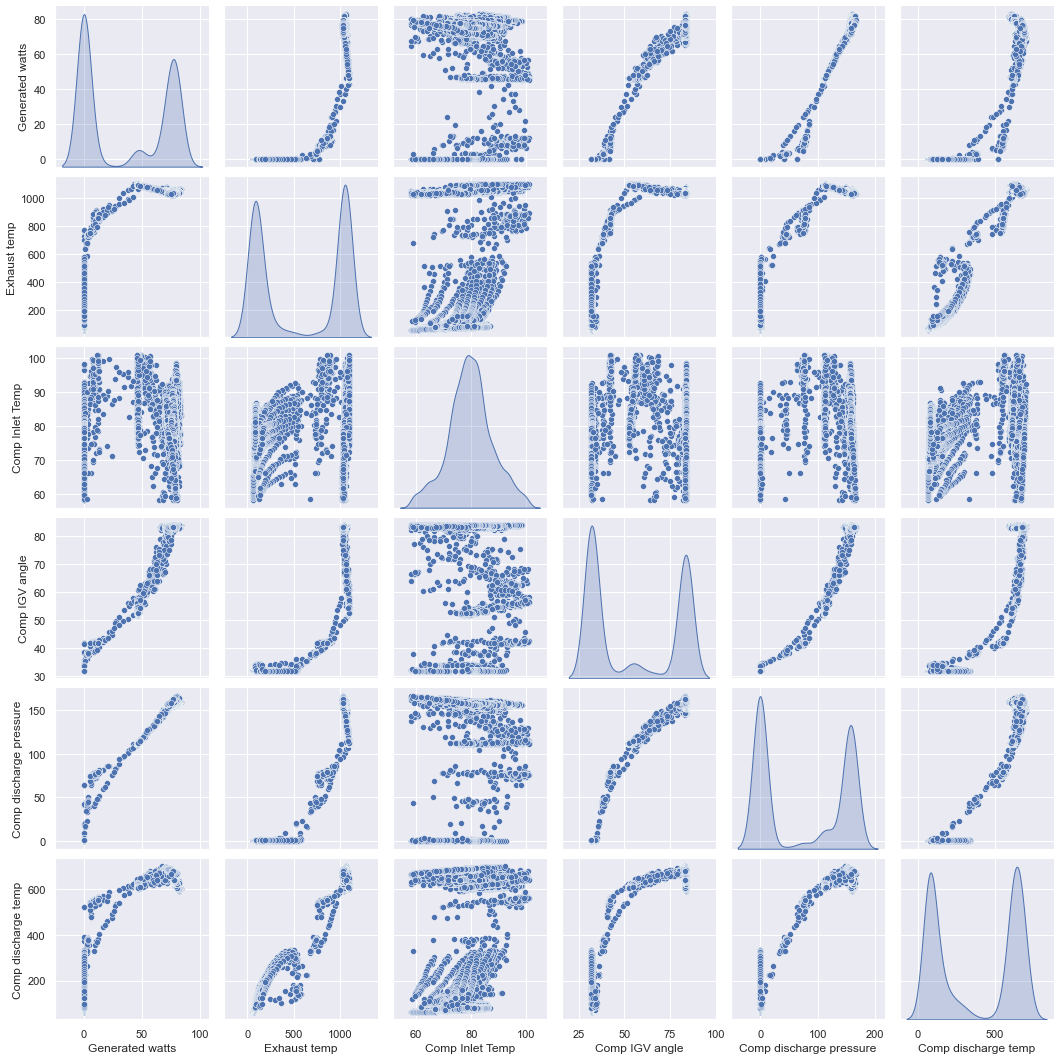

In [41]:
sns.pairplot(turbine_data,diag_kind="kde")


In [37]:
# using heatmap to see correlation between different features and with 'Generated watts'

<AxesSubplot:>

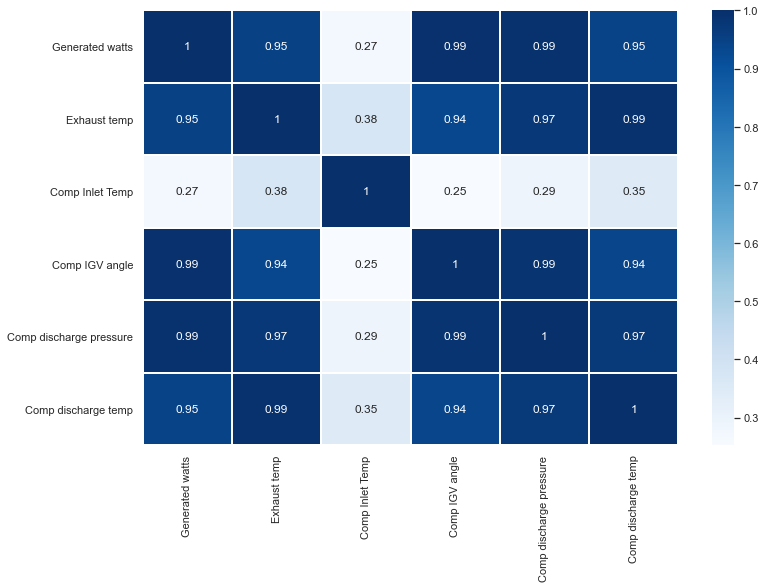

In [52]:
sns.heatmap(turbine_data.corr(),linewidths=2,cmap="Blues",annot=True)

In [53]:
# from the above heatmap; Comp Inlet temp has a low correlation; So we can consider ignoring that during feature selection